Having clean datasets that you trust is a fundamental step in any data project. Also, understanding how the data works will make any analysis much easier.

Regression discontinuity design (RDD) requires us to have, not surprisingly, some sort of discontinuity in the treatment variable. The basic setup goes like this. Imagine that you have a treatment variable T, like discounts, and profits are our outcome. Then, we can define the potential outcomes under different discount treatments: Profit(low)Profit(low) and Profit(high)Profit(high). For RDD to work, the treatment is a discontinuous function of an observed running variable R such that

$$T_i=1{R_i>c}$$

In other words, this is saying that treatment is zero when $R$ is below a threshold $c$ and one otherwise. To give a concrete example, let’s say the company gives more discounts to customers that bought more than \$500 in pet shop items.

In this case, the running variable $R$ is spend in pet shop items, and the discontinuity happens around $c=500$. This means that we get to observe the potential outcome $Profit(low)$ when $c<500$ and $Profit(high)$ when $c>500$.

Now, since treatment turns on suddenly at the threshold $c$, we can leverage that to identify the effect of the treatment by comparing customers just above and just below the threshold.

So in order to run RDD, the first step is to identify some discontinuity that abruptly changes the discount. In other words, we need to find a running variable R that makes discount discontinuous, which is what we will do in this milestone.

## Use pandas to read rdd_data.csv into memory

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
FILE = 'rdd_data.csv'

sns.set_style("darkgrid")
pd.options.display.max_columns = 100

## Explore your data.

- Display the first few lines of the dataset.
- Check whether the data types are correct (no numeric data treated as strings).
- If they are not correct, convert data that should be of type numeric to the appropriate type.

In [48]:
data = pd.read_csv(FILE)
data.head()

,spend_1m_baby,spend_2m_baby,spend_3m_baby,spend_4m_baby,spend_5m_baby,spend_6m_baby,spend_1m_clothes,spend_2m_clothes,spend_3m_clothes,spend_4m_clothes,spend_5m_clothes,spend_6m_clothes,spend_1m_health,spend_2m_health,spend_3m_health,spend_4m_health,spend_5m_health,spend_6m_health,spend_1m_pet,spend_2m_pet,spend_3m_pet,spend_4m_pet,spend_5m_pet,spend_6m_pet,spend_1m_groceries,spend_2m_groceries,spend_3m_groceries,spend_4m_groceries,spend_5m_groceries,spend_6m_groceries,spend_1m_eletronic,spend_2m_eletronic,spend_3m_eletronic,spend_4m_eletronic,spend_5m_eletronic,spend_6m_eletronic,sales,discount,profit,age,gender,cust_state,tenure
0,5,0,0,0,10,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,55,180,20.000000,10.000000,15.0,40.0,0,0,0,0.0,0.0,0.0,1442.30,$ 4.0,66.93,30,0.0,MA,19
1,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0.000000,0.000000,0.0,0.0,0,0,0,0.0,0.0,0.0,883.96,$ 2.0,41.33,30,1.0,MG,20
2,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,25,10,254.255197,289.255197,65.0,30.0,0,0,0,0.0,0.0,0.0,4900.67,$ 224.0,15.88,29,0.0,RJ,21
3,0,0,0,0,0,0.0,25,25.0,0.0,25.0,25.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,30,10,5.000000,30.000000,0.0,45.0,0,0,0,0.0,0.0,0.0,1547.48,$ 1.0,74.99,36,1.0,BA,18
4,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,40,0,0.000000,10.000000,0.0,45.0,0,0,0,0.0,0.0,0.0,1335.23,$ 13.0,52.41,37,0.0,PB,19


In [49]:
data.describe(include='all')

,spend_1m_baby,spend_2m_baby,spend_3m_baby,spend_4m_baby,spend_5m_baby,spend_6m_baby,spend_1m_clothes,spend_2m_clothes,spend_3m_clothes,spend_4m_clothes,spend_5m_clothes,spend_6m_clothes,spend_1m_health,spend_2m_health,spend_3m_health,spend_4m_health,spend_5m_health,spend_6m_health,spend_1m_pet,spend_2m_pet,spend_3m_pet,spend_4m_pet,spend_5m_pet,spend_6m_pet,spend_1m_groceries,spend_2m_groceries,spend_3m_groceries,spend_4m_groceries,spend_5m_groceries,spend_6m_groceries,spend_1m_eletronic,spend_2m_eletronic,spend_3m_eletronic,spend_4m_eletronic,spend_5m_eletronic,spend_6m_eletronic,sales,discount,profit,age,gender,cust_state,tenure
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000.000000,10000.000000,9000.000000,10000,10000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,817,NaN,NaN,NaN,27,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$ 1.0,NaN,NaN,NaN,SP,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,277,NaN,NaN,NaN,2160,NaN
mean,0.762500,0.500000,0.487000,0.473000,0.432500,64.583614,3.92000,23.086333,22.113359,24.667843,26.317290,27.783487,0.76000,0.350000,0.460000,0.550000,0.450000,0.450000,0.122000,0.032000,0.082000,0.072000,0.044000,0.07200,22.677000,20.056500,96.571982,95.392925,96.007824,95.042161,3.450000,2.15000,2.400000,3.695413,6.973173,7.055009,3920.136075,NaN,47.645930,31.516500,0.505667,NaN,20.985900
std,2.107496,2.766002,2.672741,2.502378,2.201347,518.637042,10.74803,159.879037,155.525896,162.129561,188.926692,185.439520,8.79944,8.178275,9.787644,11.077444,9.529249,11.171839,1.557356,0.979322,1.820332,1.719044,1.130571,1.41245,24.948966,39.747104,169.103377,167.463488,165.459587,165.240350,41.391652,46.58964,47.375779,80.473089,160.435451,151.792637,3872.673356,NaN,47.966765,6.438204,0.499996,NaN,2.445261
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,605.660000,NaN,-395.040000,15.000000,0.000000,NaN,15.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1354.617500,NaN,32.812500,27.000000,0.000000,NaN,19.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,15.000000,5.000000,15.000000,15.000000,15.000000,15.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2240.340000,NaN,45.990000,31.000000,1.000000,NaN,21.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,35.000000,20.000000,130.000000,129.975514,130.486049,130.000000,0.000000,0.00000,0.000000,0.000000,

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 43 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   spend_1m_baby       10000 non-null  int64  
 1   spend_2m_baby       10000 non-null  int64  
 2   spend_3m_baby       10000 non-null  int64  
 3   spend_4m_baby       10000 non-null  int64  
 4   spend_5m_baby       10000 non-null  int64  
 5   spend_6m_baby       10000 non-null  float64
 6   spend_1m_clothes    10000 non-null  int64  
 7   spend_2m_clothes    10000 non-null  float64
 8   spend_3m_clothes    10000 non-null  float64
 9   spend_4m_clothes    10000 non-null  float64
 10  spend_5m_clothes    10000 non-null  float64
 11  spend_6m_clothes    10000 non-null  float64
 12  spend_1m_health     10000 non-null  int64  
 13  spend_2m_health     10000 non-null  int64  
 14  spend_3m_health     10000 non-null  int64  
 15  spend_4m_health     10000 non-null  int64  
 16  spend

In [51]:
data['discount'].unique()[:10]

array(['$ 4.0', '$ 2.0', '$ 224.0', '$ 1.0', '$ 13.0', '$ 102.0',
       '$ 149.0', '$ 19.0', '$ 444.0', '$ 272.0'], dtype=object)

In [52]:
data.isna().sum()[data.isna().sum() > 0]

gender    1000
dtype: int64

In [53]:
data['discount'] = data['discount'].str.split(expand=True).iloc[:, 1].astype(float)

In [56]:
data.to_parquet('rdd_clean.parq.gzip')

## A running variable is a variable in which the treatment might be discontinuous. Identify a running variable in which the discount treatment is discontinuous.

- Group your dataframe by the running variable age and aggregate discount with the mean. Plot age on the x-axis and discount on the y-axis. Is there any discontinuity in discount by age?
- Repeat the procedure above with the running variable tenure.
- Repeat the procedure above with a running variable of your choice.

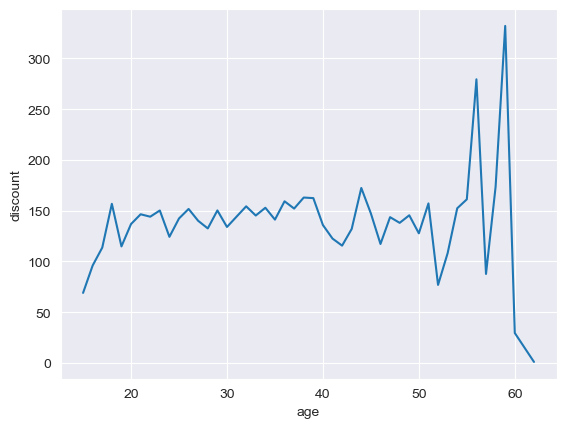

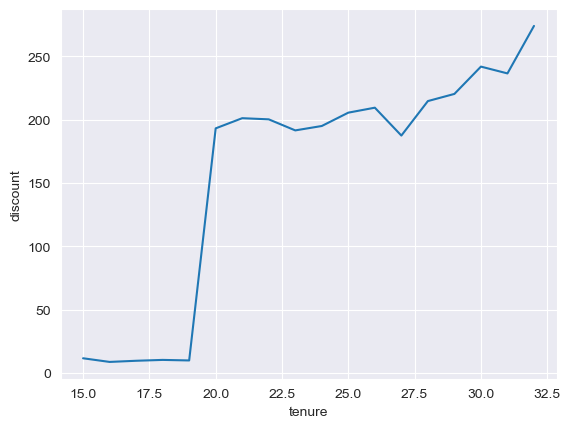

In [45]:
for feat in ['age', 'tenure']:
    data.groupby(feat)['discount'].mean().plot()
    plt.xlabel(feat)
    plt.ylabel('discount')
    plt.show()

## In the step above, we saw that there is a huge discontinuity in discounts by tenure. 

If we check with the e-commerce company, they will tell us that this discontinuity is expected. The e-commerce company gives a discount bonus to customers that have been with them for a long time. More specifically, the company gives this discount bonus once a customer reaches a tenure of 20 months. We call this point the discontinuity threshold.

- Aggregate your dataframe by tenure and aggregate sales with the mean. Plot sales on the y-axis and tenure on the x-axis. Does the discontinuity in discount translate to a discontinuity in sales?
- Repeat the procedure above replacing sales with profits. Does the discontinuity in discount translate to a discontinuity in profits?

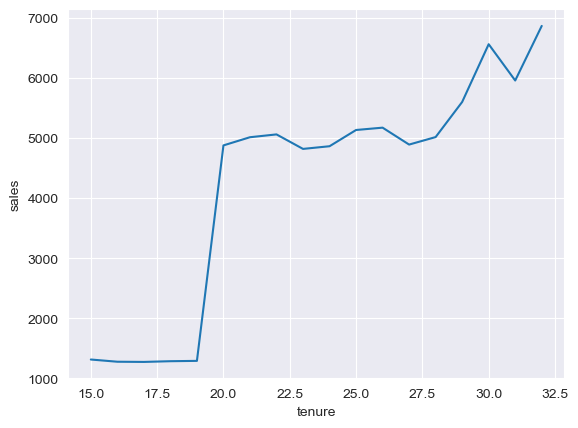

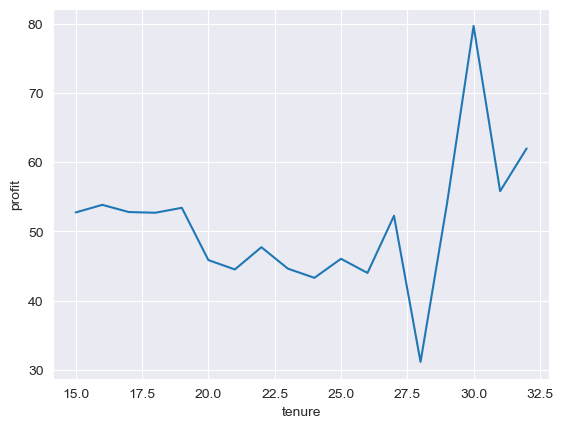

In [36]:
for field in ['sales', 'profit']:
    data.groupby('tenure')[field].mean().plot()
    plt.ylabel(field)
    plt.show()

## We can only leverage discontinuities if the customers at the right of the threshold are comparable to the ones to the left of the threshold. 

In other words, we need customers to be roughly equal, while only discount increases as we cross the 20-month tenure threshold. This can fail if customers can manipulate their tenure, for example, if they could pretend to have a 20-month tenure just to have a discount. When that happens, we tend to see bunching around the threshold.

- Group your dataframe by tenure and count the number of customers at each tenure.
- With the aggregated data, plot the tenure on the x-axis and the number of customers on the y-axis.
- Is there any evidence of bunching?

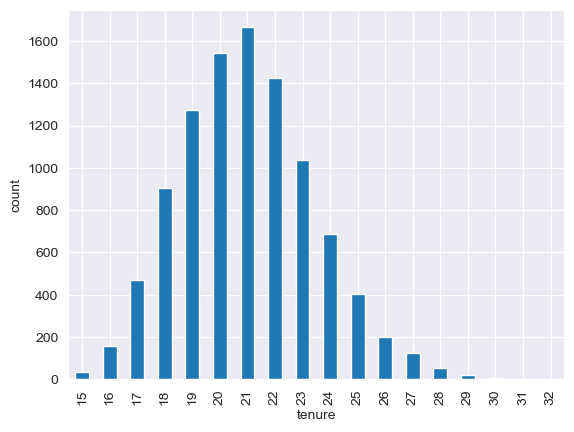

In [43]:
data.groupby('tenure').size().plot.bar()
plt.ylabel('count')
plt.show()